In [128]:
import pandas as pd # sirve para el manejo y analisis de datos y estructuras 

In [129]:
import numpy as np # sirve para el calculo numerico y analisis de datos 

In [130]:
import seaborn as sns # sirve para crear graficos estadisticos 

In [131]:
import matplotlib.pyplot as plt # sirve para crear graficos en dos dimensiones

In [321]:
import plotly.graph_objs as go #graficos en tres dimensiones

In [133]:
import plotly.express as px  #2-graficos en tres dimensiones

In [134]:
from sklearn import metrics # libreria para modelos de ciencias de datos

In [135]:
from sklearn.model_selection import train_test_split # libreria para modelos de ciencias de datos

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
from sklearn.linear_model import LogisticRegression # libreria para modelos de ciencias de datos

In [138]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [139]:
from sklearn.linear_model import LinearRegression # libreria para modelos de ciencias de datos

In [140]:
from sklearn import metrics

In [141]:
from sklearn.cluster import KMeans

In [142]:
from sklearn.preprocessing import LabelEncoder

In [143]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [144]:
from sklearn.metrics import classification_report

In [145]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [146]:
from scipy.cluster.hierarchy import cophenet

In [147]:
from sklearn.cluster import KMeans

In [148]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [149]:
from scipy.spatial.distance import pdist

In [150]:
from sklearn.metrics import classification_report, confusion_matrix # libreria para modelos de ciencias de datos

In [151]:
import warnings

In [152]:
warnings.filterwarnings('ignore')

# Paso 1 Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.    

In [153]:
Datos = pd.read_csv('c:/Users/Francy kat/Mall_Customers.csv')

In [154]:
# lectura de datos
Datos.head(10)

,ID_Cliente,Genero,Edad,Sueldo_Anual,Puntuacion
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [155]:
Datos.shape

(200, 5)

In [156]:
#Descripcion de datos
Datos.describe()

,ID_Cliente,Edad,Sueldo_Anual,Puntuacion
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [157]:
data=Datos.drop(['Puntuacion'], axis=1)

In [158]:
# lectura de datos
Datos.head()

,ID_Cliente,Genero,Edad,Sueldo_Anual,Puntuacion
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [159]:
Datos.isna().sum()

ID_Cliente      0
Genero          0
Edad            0
Sueldo_Anual    0
Puntuacion      0
dtype: int64

In [160]:
Datos.dropna()

,ID_Cliente,Genero,Edad,Sueldo_Anual,Puntuacion
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


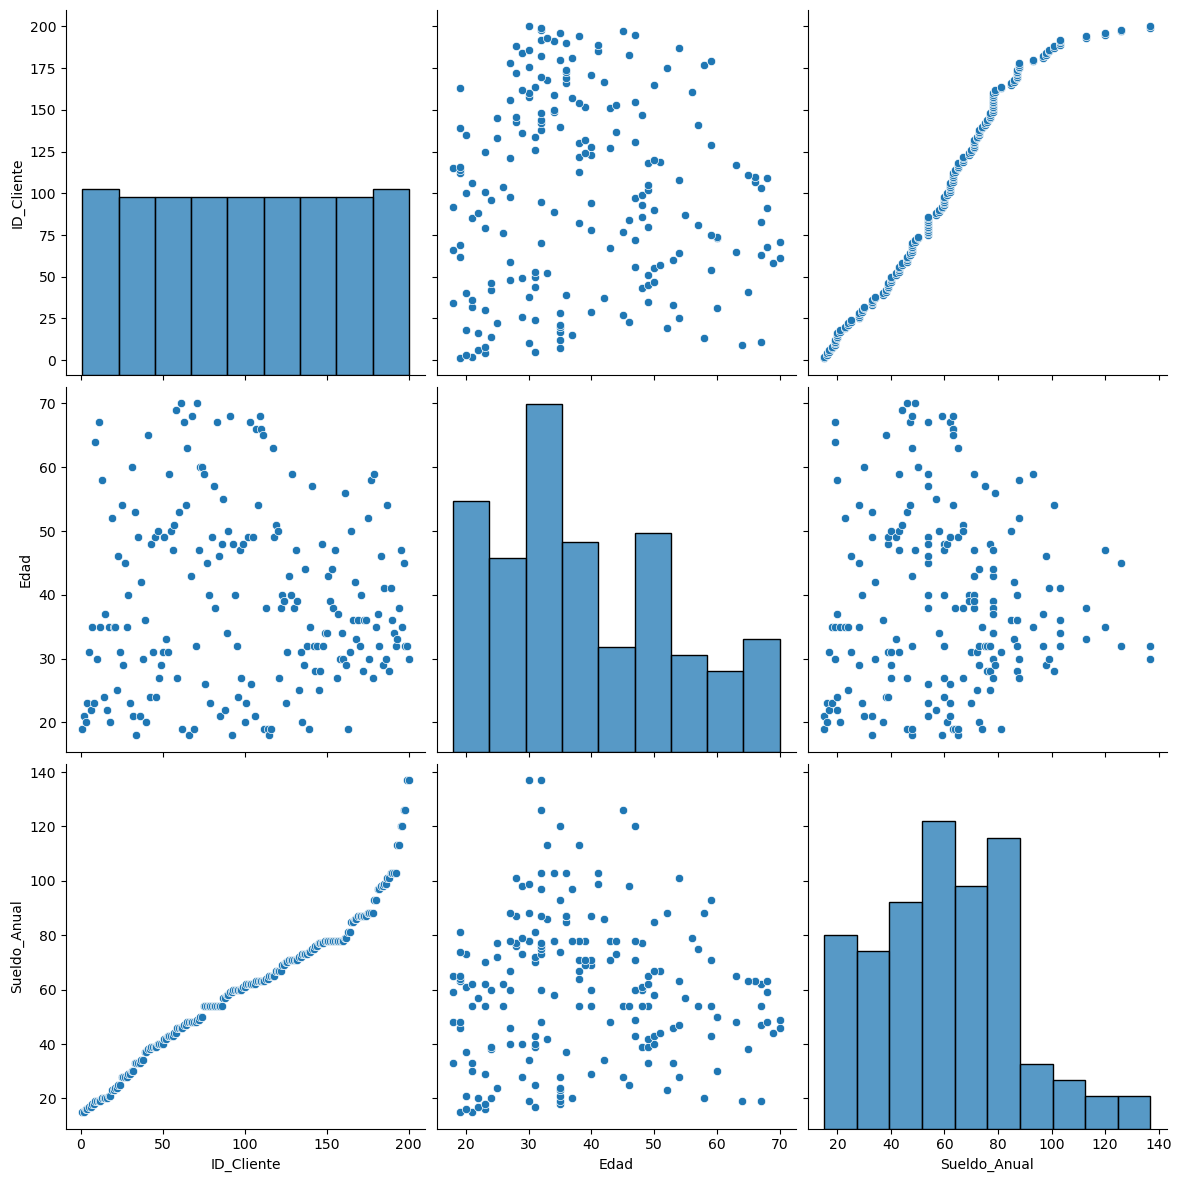

In [161]:
sns.pairplot(data.dropna(), size=4, kind='scatter')

# DIAGRAMA DE CAJAS

<Axes: >

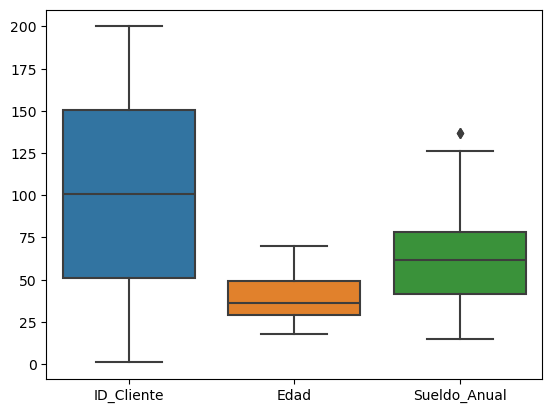

In [162]:
sns.boxplot(data=data)

Text(0.5, 1.0, 'validacion datos faltantes o atipicos')

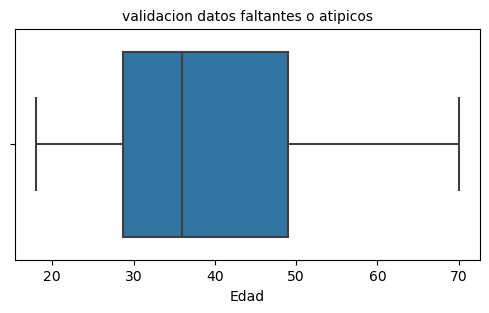

In [163]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Edad'])
plt.title('validacion datos faltantes o atipicos', fontsize= 10)

# Paso 2 Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [164]:
# Validacion Datos Faltantes

In [165]:
print("Clientes con edad igual a cero:", Datos["Edad"].isin([0]).sum())
print("Clientes con sueldo igual a cero:", Datos["Sueldo_Anual"].isin([0]).sum())
print("Clientes con puntuacion igual a cero:", Datos["Puntuacion"].isin([0]).sum())


Clientes con edad igual a cero: 0
Clientes con sueldo igual a cero: 0
Clientes con puntuacion igual a cero: 0


In [166]:
#Identificacion de datos atipicos

Text(0.5, 1.0, 'Identificacion datos atipicos')

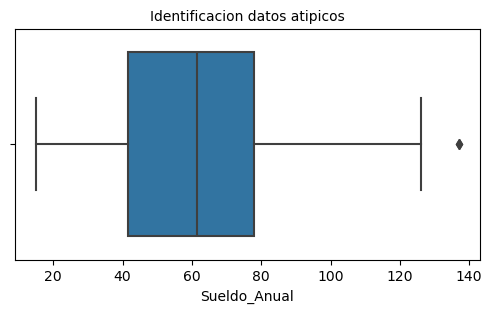

In [167]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Sueldo_Anual'])
plt.title('Identificacion datos atipicos', fontsize= 10)

In [168]:
# Conteo de Datos Atipicos

In [169]:
nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Sueldo_Anual']<nivel_minimo)|(Datos['Sueldo_Anual'])>nivel_maximo).sum()
print("Cantidad de datos atipicos{}".format(Total_Atipicos))

Cantidad de datos atipicos0


In [170]:
# Filtro de Datos Atipicos 

In [171]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID_Cliente    200 non-null    int64 
 1   Genero        200 non-null    object
 2   Edad          200 non-null    int64 
 3   Sueldo_Anual  200 non-null    int64 
 4   Puntuacion    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Paso 3 Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [172]:
# Filtro de columnas del modelo

In [199]:
Datos = pd.read_csv('c:/Users/Francy kat/Mall_Customers.csv')

In [200]:
data=Datos.drop(['Puntuacion'], axis=1)

In [201]:
# lectura de datos
Datos.head()

,ID_Cliente,Genero,Edad,Sueldo_Anual,Puntuacion
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [209]:
Datos = Datos[["Puntuacion"]]

In [210]:
Datos.head()

,Puntuacion
0,39
1,81
2,6
3,77
4,40


In [285]:
Datos = pd.read_csv('c:/Users/Francy kat/Mall_Customers.csv')

In [286]:
Datos = Datos[["Sueldo_Anual"]]

In [287]:
Datos.head()

,Sueldo_Anual
0,15
1,15
2,16
3,16
4,17


In [300]:
Datos = pd.read_csv('c:/Users/Francy kat/Mall_Customers.csv')

In [301]:
Datos = Datos[["Edad","Sueldo_Anual","Puntuacion"]]

In [302]:
Datos.head()

,Edad,Sueldo_Anual,Puntuacion
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
